# K-means clustering
## Agenda

- classical K-means Algorithmの紹介
- Gap statisticを用いたcentroid数の最適化
- scikit-learn apiの確認

### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


In [2]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.15.4
BuildVersion:	19E287


### Python

In [3]:
!python -V

Python 3.7.4


### Install packages

In [4]:
pass

### Import

In [5]:
import itertools

import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 関数

In [6]:
def zscore(X, axis = 0):
    _mean = np.mean(X, axis  = axis)
    _std = np.std(X, axis  = axis)
    _std[_std == 0.0] = 1
    
    return (X - _mean)/_std

## 1. K-means clusteringとは？
### Algorithm

1. 各data pointに対してランダムにclusterを割り振る
2. 各クラスタに割り当てられたdata pointについて重心を計算する
3. 各data pointについて、2で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当て直す
4. 各data pointの所属情報が変化しない場合、終了。それ以外の場合は2に戻る

### 今回の実装前提条件

- 距離はユークリッド距離とする

In [7]:
class K_means:
    def __init__(self, n_clusters, max_iter = 1000, random_seed = 42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_seed = np.random.RandomState(random_seed)
    
    def fit(self, X, out = False):
        cycle = itertools.cycle(range(self.n_clusters)) # イテラブルオブジェクトの要素を無限に繰り返すイテレータ
        self._label = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype = np.int)
        self.random_seed.shuffle(self._label) # 初期クラスタを設定
        label_list = np.zeros(X.shape[0])
        dist_maxtrix = np.zeros((X.shape[0], self.n_clusters))
        iter_count = 0
        self.cluster_centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        while (not np.all(self._label == label_list)) and iter_count < self.max_iter:
            for i in range(self.n_clusters):
                X_g = X[self._label == i, :]
                if X_g.size > 0: # empty array check
                    self.cluster_centroids[i, :] = np.mean(X_g, axis = 0)
            dist_matrix = np.sum((X[:,:, np.newaxis] - self.cluster_centroids.T[np.newaxis, :, :])**2, axis = 1, )
            label_list = self._label
            self._label = np.argmin(dist_matrix, axis  = 1)
            iter_count += 1
        if out:
            return self._label
        
        def predict(self, X):
            dist_matrix = np.sum((X[:,:, np.newaxis] - self.cluster_centroids.T[np.newaxis, :, :])**2, axis = 1)
            labels = np.argmin(dist_matrix, axis  = 1)
            return labels
        

### test

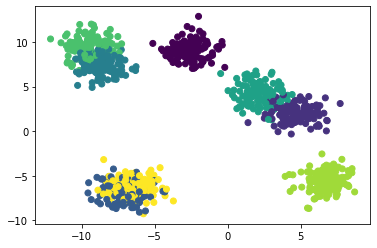

In [8]:
n = 8
k = 2
X, y = make_blobs(1000, n_features=k, centers=n, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c = y);

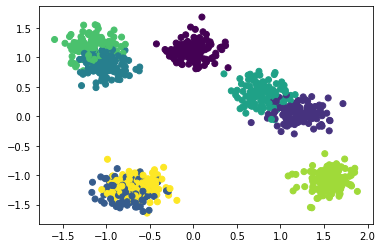

In [9]:
X_norm = zscore(X)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y);

In [10]:
model = K_means(n_clusters= n)
y_pred = model.fit(X_norm, out = True)

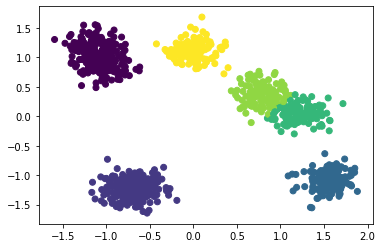

In [11]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c = y_pred);